In [1]:
from PIL import Image
import numpy as np
import torch

DEVICE =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
from Unet_model import UNet

model = UNet(n_channels=3, n_classes=1).to(DEVICE)

In [2]:
import torch
model.load_state_dict(torch.load('C:/Users/pytho/Downloads/checkpointN20_.pth (1).tar')['state_dict'])
#model = torch.load("D:/BrainTumor_SkinLesions_project/skin_lease_entire_model.pth")
model.eval()

UNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upconv1): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
  (conv6): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upconv2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
  (conv7): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upconv3): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
  (conv8): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upconv4): ConvTranspose2d(128, 64, kernel_size=(2, 2)

In [3]:
def load_and_resize_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0
    if len(image_array.shape) == 2: 
        image_array = np.stack((image_array,) * 3, axis=-1)
    image_array = np.expand_dims(image_array.transpose(2, 0, 1), axis=0) 
    
    return image_array
image_path = "C:/Users/pytho/Downloads/ISIC_0000023.jpg"
image = Image.open(image_path)
resized_image = load_and_resize_image(image_path)
img_tensor = torch.Tensor(resized_image).to(DEVICE)
generated_mask = model(img_tensor).squeeze().cpu()
generated_mask

tensor([[-1.5184, -2.0619, -2.3188,  ..., -2.3643, -2.3107, -1.7137],
        [-2.0982, -2.7822, -3.0671,  ..., -3.1353, -3.0766, -2.5312],
        [-2.3237, -2.9636, -3.1586,  ..., -3.1892, -3.2301, -2.7357],
        ...,
        [-2.3462, -3.0069, -3.1731,  ..., -3.1291, -3.1481, -2.7601],
        [-2.2132, -2.9213, -3.1107,  ..., -3.0868, -3.0008, -2.5746],
        [-1.6709, -2.2877, -2.5563,  ..., -2.5044, -2.3717, -1.8607]],
       grad_fn=<ToCopyBackward0>)

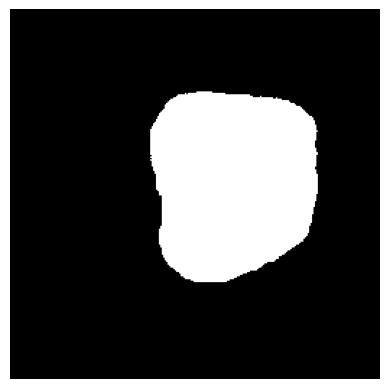

In [4]:
import matplotlib.pyplot as plt

# Assuming mask_tensor is the tensor you provided
#mask_array = generated_mask.detach().numpy()  # Convert tensor to NumPy array
predicted_array = (generated_mask > 0.5).float().detach().numpy()

# Display the image using Matplotlib
plt.imshow(predicted_array.squeeze(), cmap='gray')  # Use 'gray' colormap for binary images
plt.axis('off')  # Turn off axis
plt.show()